## Objectives ##
1. Using scikit learn to implement simple linear regression
2. Create a model, train it, test it and use the model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

##Downloading the data#

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2023-07-11 10:10:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   159KB/s    in 0.4s    

2023-07-11 10:10:23 (159 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



##### We have the fuelconsumption.csv which contains model specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sales in canada####


### Reading the data in ###

In [3]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


##### Selecting some features to explore more #####

In [5]:
cdf=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


####Plotting each of the features####

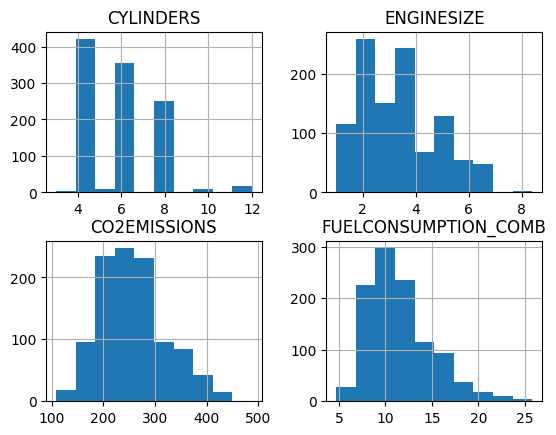

In [6]:
viz= cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

#### PLotting these features against emission to see if we get a linear relationship ####

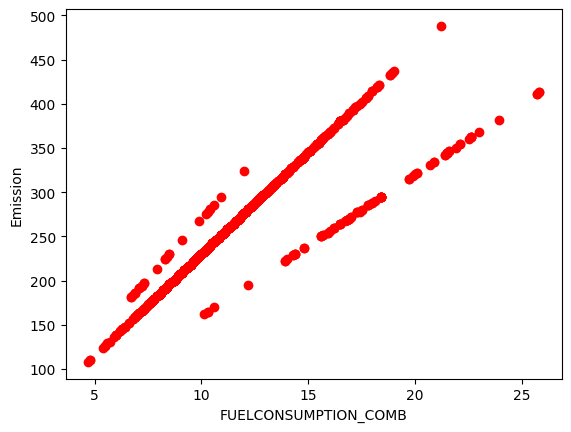

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

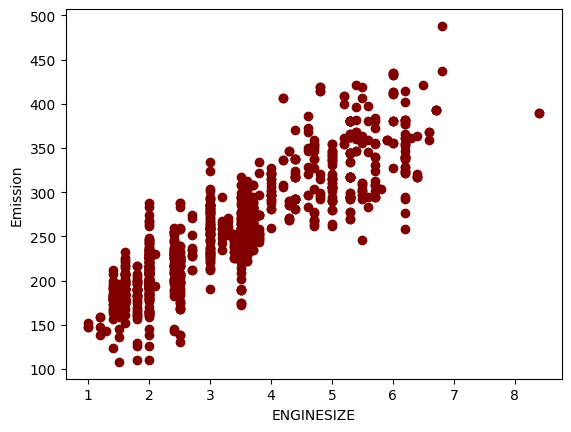

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='maroon')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

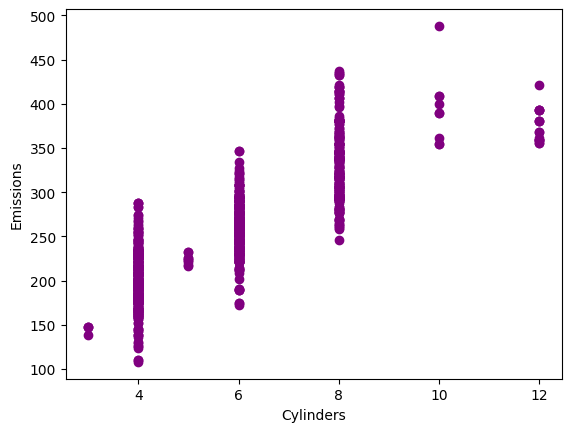

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='purple')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

##Creating train and test dataset ##
###### We train with the training set and we test the data with the testing set. This provides a more accurate evaluation as the testing dataset is not a part of the dataset that have been used to train the model. 80% of the entire dataset will be used to train the model, and 20% will be used for testing. We create a mask to select random rows using np.random.ran()#####

In [10]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

## Simple Regression Model ##
Linear regression fits a linear model with coefficients B=(B1, ......Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset and the predicted value that using linear approximation

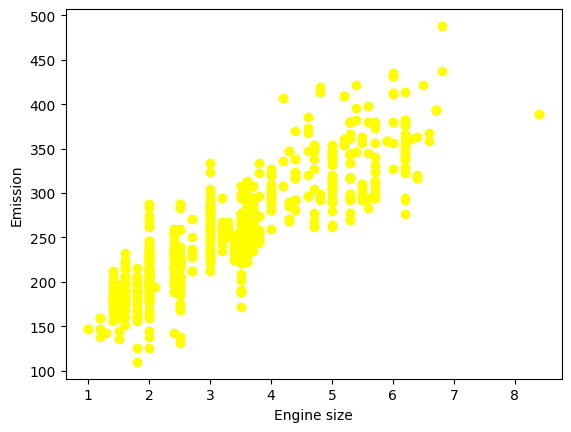

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='yellow')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Modelling ##
Using sklearn package to model data

In [12]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y)
print('coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

coefficients: [[38.48103105]]
Intercept: [127.49721761]


Cofficient and intercept in the simple linear regression are the parameters of the fit line.
## Plot outputs ##

Text(0, 0.5, 'Emission')

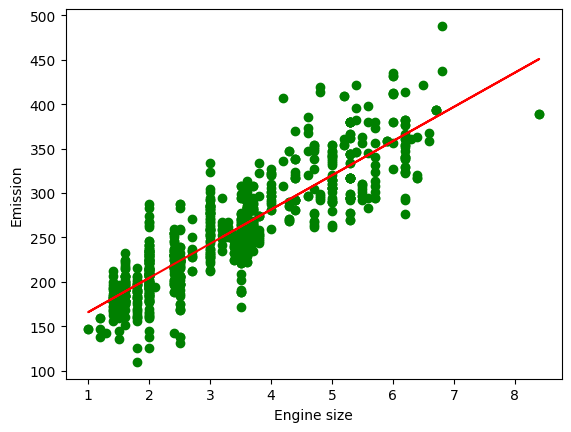

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation ##
We compare the actual values and predicted values to calculate the accuracy of a regression model.

*Mean absolute error*: Average error

*Mean squared error*: The focus is geared more towards large errors.

*Root mean squared error(RMSE)*: It represents how close the data points are to be fitted regression line. The higher the value the better the model fits the data.


In [18]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=reg.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-test_y)))
print ("Residual sum of squares (MSE): %.2f" %np.mean((test_y_-test_y)**2))
print("R2-score: %.2f" %r2_score(test_y, test_y_))


Mean absolute error: 25.21
Residual sum of squares (MSE): 1153.98
R2-score: 0.75


Let's see the evaluation metrics using FUELCONSUMPTION_COMB feature.

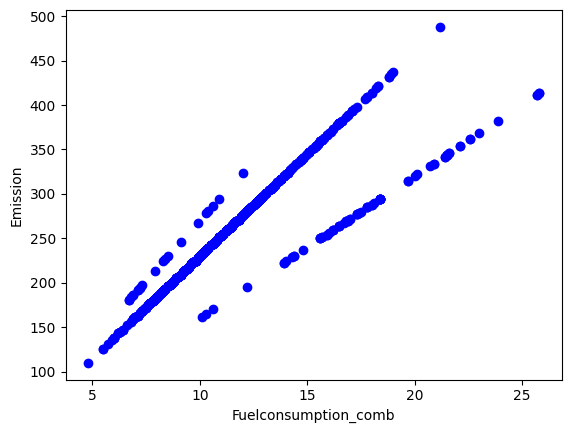

In [19]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuelconsumption_comb")
plt.ylabel("Emission")
plt.show()

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[15.93589842]]
Intercept:  [71.29945839]


Text(0, 0.5, 'Emission')

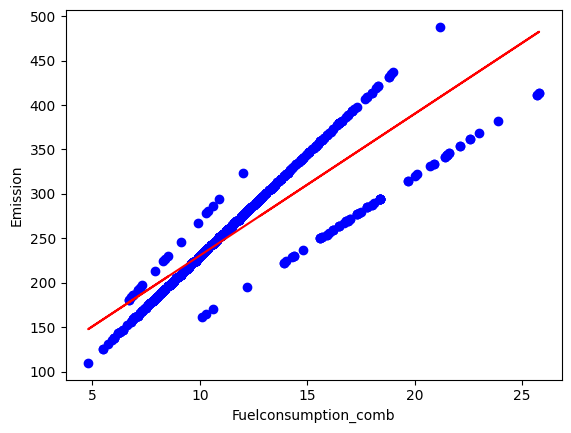

In [21]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Fuelconsumption_comb")
plt.ylabel("Emission")

In [22]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 20.95
Residual sum of squares (MSE): 806.07
R2-score: 0.82
